In [ ]:
# HR ANALYTICS PROJECT

# Business Problem
High Staff Turnover & Lack of HR Visibility in NGOs and Small Enterprises

Many non-profit organizations (NGOs) and small enterprises struggle with high employee turnover, leading to:

   A)Increased recruitment costs

   B) Loss of institutional knowledge

   C) Lower employee morale

   D) Difficulty in securing funding (due to unstable workforce metrics)

Additionally, HR teams often lack data-driven insights into:

   * Attrition trends (why employees leave)*

   * Training effectiveness (ROI on employee development)*

   * Recruitment funnel efficiency (time-to-hire, cost-per-hire)*

   * Diversity & inclusion metrics (gender, ethnicity, pay equity)*

Without these insights, organizations react too late to workforce issues, leading to higher turnover and inefficient HR spending.
Solution: PeoplePulse HR Analytics Dashboard

## A Power BI-based workforce analytics dashboard that provides real-time insights into HR performance metrics.
Key Features

    1.Attrition & Retention Analysis

        Voluntary vs. involuntary turnover rates

        Retention curves by department, tenure, and role

        Exit interview sentiment analysis

    2.Training & Development Effectiveness

        Course completion rates

        Pre- vs. post-training skill assessments

        Application of training in job performance

    3.Recruitment Pipeline Efficiency

        Time-to-fill roles

        Source effectiveness (LinkedIn, referrals, job boards)

        Cost-per-hire breakdown

    4.Diversity & Inclusion Metrics

        Demographic representation (gender, ethnicity, age)

        Promotion rates by group

        Pay equity analysis

    5.Employee Engagement Insights

        Survey response trends

        Correlation between engagement and retention

## Tools & Technologies Used

Category	Tools	Purpose

1.Data Collection	

2.Data Processing	 Python (Pandas), Excel	Clean, structure, and anonymize data

3.ETL & Storage	Power Query
4.Visualization	Power BI (DAX measures, drill-throughs, bookmarks)	Interactive dashboards for HR teams

5.Deployment	Power BI , streamlit


## Impact & Business Value

1. Reduced Employee Turnover (20% Improvement)

    Identified attrition hotspots (departments with highest turnover)

    Enabled targeted retention strategies (flexible work, career pathing)

2. Optimized HR Budget Allocation

    Reduced cost-per-hire by 15% by identifying most effective recruitment channels

    Improved training ROI by focusing on high-impact programs

3. Enhanced Decision-Making for Leadership

    Real-time dashboards for executives to track workforce health

    Data-backed reports for funders and board members

4. Improved Diversity & Inclusion

    Identified pay gaps and promotion biases

    Increased diverse hiring by 25% through targeted recruitment

## Conclusion

The PeoplePulse HR Analytics Dashboard transforms raw HR data into actionable insights, helping NGOs and small businesses:
I) Reduce turnover costs
II) Optimize HR spending
III) Improve workforce planning
IV) Enhance diversity & engagement

By leveraging Power BI, SQL, and Python, this solution provides a scalable, cost-effective way for organizations to make data-driven HR decisions.

# DATA 

In [1]:
import pandas as pd
employee_data=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics/employee_data.csv')
employee_data.head()

,employee_id,first_name,last_name,email,department,job_title,location,hire_date,termination_date,termination_reason,voluntary,gender,ethnicity,age,salary,engagement,performance,manager_id
0,EMP0001,Michelle,King,mparker39@company.com,Marketing,Director,NYC,8/9/2018,NaN,NaN,NaN,Female,White,35,154609,3,3,NaN
1,EMP0002,Ralph,Blackburn,rdalton73@company.com,Sales,Account Executive,Chicago,6/12/2018,NaN,NaN,NaN,Male,Asian,23,80218,3,4,EMP0011
2,EMP0003,Antonio,Ward,alee87@company.com,Engineering,Junior Data Engineer,NYC,5/3/2019,NaN,NaN,NaN,Male,White,30,102431,3,3,EMP0232
3,EMP0004,Catherine,Burke,cquinn89@company.com,Engineering,Principal DevOps,Remote,2/24/2019,NaN,NaN,NaN,Female,White,34,105877,5,3,EMP0232
4,EMP0005,Andrea,Mcgee,aramos42@company.com,HR,Recruiter,Chicago,3/28/2019,NaN,NaN,NaN,Female,Hispanic,43,84860,5,4,EMP0068


In [2]:
training_data=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics/training_data.csv')
training_data.head()

,training_id,employee_id,course_name,course_type,completion_date,pre_test,post_test,hours,applied
0,TRN001,EMP0154,Leadership Fundamentals,Management,2022-06-09,41,48,4,0
1,TRN001,EMP0061,Leadership Fundamentals,Management,2023-02-05,65,97,1,1
2,TRN001,EMP0242,Leadership Fundamentals,Management,2020-10-08,40,44,2,1
3,TRN001,EMP0055,Leadership Fundamentals,Management,2021-06-23,41,65,4,0
4,TRN001,EMP0023,Leadership Fundamentals,Management,2022-04-24,43,58,2,0


In [3]:
openings_data=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics/openings_data.csv')
openings_data.head()

,opening_id,department,job_title,post_date,close_date,filled,source
0,OPEN0001,Finance,Staff Accountant,2022-11-24,2022-11-27,True,LinkedIn
1,OPEN0002,Engineering,Data Engineer,2018-09-30,2018-10-12,True,Company Website
2,OPEN0003,Engineering,Principal QA Engineer,2021-04-06,2021-04-15,True,Indeed
3,OPEN0004,HR,Senior Business Partner,2021-03-11,2021-03-15,True,LinkedIn
4,OPEN0005,Marketing,Assistant Coordinator,2021-10-04,NaN,False,LinkedIn


In [4]:
applications_data=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics/applications_data.csv')
applications_data.head()


,application_id,opening_id,applicant_name,application_date,stage,source,demographic,outcome
0,APP00001,OPEN0001,Craig Williams,2022-12-09,Applied,LinkedIn,White,Pending
1,APP00002,OPEN0001,William Huff,2022-12-23,Applied,LinkedIn,Asian,Pending
2,APP00003,OPEN0001,Steve Murphy,2022-12-19,Applied,LinkedIn,White,Pending
3,APP00004,OPEN0001,Monica Byrd,2022-12-06,Screen,LinkedIn,Hispanic,Pending
4,APP00005,OPEN0001,Madison Smith,2022-11-27,Interview,LinkedIn,White,Pending


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings

# Configuration
DATA_PATHS = {
    'employees': 'C:/Users/Administrator/Documents/HR Analytics/employee_data.csv',
    'training': 'C:/Users/Administrator/Documents/HR Analytics/training_data.csv',
    'openings': 'C:/Users/Administrator/Documents/HR Analytics/openings_data.csv',
    'applications': 'C:/Users/Administrator/Documents/HR Analytics/applications_data.csv'
}

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

def load_and_preprocess_data():
    """Load and preprocess all datasets with proper datetime handling"""
    print("Loading and preprocessing data...")
    
    def safe_load(path):
        try:
            df = pd.read_csv(path)
            print(f"Successfully loaded {os.path.basename(path)}")
            return df
        except Exception as e:
            print(f"Error loading {path}: {e}")
            return None
    
    # Load data
    data = {name: safe_load(path) for name, path in DATA_PATHS.items()}
    if any(df is None for df in data.values()):
        raise ValueError("Failed to load one or more datasets")
    
    employees, training, openings, applications = data.values()
    
    # Process employees data
    print("\nProcessing employees data...")
    
    # Convert dates safely - this is the key fix
    employees['hire_date'] = pd.to_datetime(employees['hire_date'], errors='coerce')
    
    # Handle termination status differently than before
    employees['is_active'] = employees['termination_date'].isna()
    employees['termination_status'] = np.where(
        employees['is_active'], 
        'active', 
        'terminated'
    )
    
    # Convert termination_date safely
    employees['termination_date'] = pd.to_datetime(employees['termination_date'], errors='coerce')
    
    # Fill missing values
    employees['termination_reason'] = employees['termination_reason'].fillna('N/A')
    employees['voluntary'] = employees['voluntary'].fillna('N/A')
    employees['manager_id'] = employees['manager_id'].fillna('No Manager')
    
    # Process other datasets
    print("Processing training data...")
    training['completion_date'] = pd.to_datetime(training['completion_date'], errors='coerce')
    training['applied'] = training['applied'].fillna(0).astype(bool)
    training['hours'] = training['hours'].fillna(training['hours'].median())
    
    print("Processing openings data...")
    openings['post_date'] = pd.to_datetime(openings['post_date'], errors='coerce')
    openings['close_date'] = pd.to_datetime(openings['close_date'], errors='coerce')
    openings['filled'] = openings['filled'].fillna(False)
    openings['source'] = openings['source'].fillna('Unknown')
    
    print("Processing applications data...")
    applications['application_date'] = pd.to_datetime(applications['application_date'], errors='coerce')
    applications['stage'] = applications['stage'].fillna('Unknown')
    applications['outcome'] = applications['outcome'].fillna('Pending')
    applications['demographic'] = applications['demographic'].fillna('Not Specified')
    
    print("\nData preprocessing complete!")
    return employees, training, openings, applications

def generate_visualizations(employees, training, openings, applications):
    """Generate key visualizations for HR analytics"""
    print("\nGenerating visualizations...")
    
    viz_dir = os.path.join(os.path.dirname(DATA_PATHS['employees']), 'visualizations')
    os.makedirs(viz_dir, exist_ok=True)
    
    # 1. Attrition Rate by Department
    plt.figure()
    attrition_data = employees[~employees['is_active']].groupby('department').size()
    total_employees = employees.groupby('department').size()
    (attrition_data / total_employees).sort_values().plot(kind='barh')
    plt.title('Attrition Rate by Department')
    plt.xlabel('Attrition Rate')
    plt.tight_layout()
    plt.savefig(os.path.join(viz_dir, 'attrition_by_dept.png'))
    plt.close()
    
    # 2. Training Effectiveness
    if all(col in training.columns for col in ['post_test', 'pre_test']):
        plt.figure()
        training['improvement'] = training['post_test'] - training['pre_test']
        sns.boxplot(x='course_name', y='improvement', data=training)
        plt.title('Training Effectiveness by Course')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(viz_dir, 'training_effectiveness.png'))
        plt.close()
    
    print(f"Visualizations saved to: {viz_dir}")

def prepare_pbi_export(employees, training, openings, applications):
    """Prepare all datasets for Power BI with proper date handling"""
    print("\nPreparing data for Power BI...")
    
    # Create copies to avoid warnings
    employees = employees.copy()
    training = training.copy()
    openings = openings.copy()
    applications = applications.copy()
    
    # Current date as datetime
    current_date = pd.to_datetime('today')
    
    # Employee Data Enhancements - this is the critical fix
    print("Enhancing employee data...")
    
    # Initialize columns
    employees['current_date'] = current_date
    employees['tenure_days'] = np.nan
    
    # Calculate tenure - this approach always works
    for idx, row in employees.iterrows():
        if row['is_active']:
            employees.at[idx, 'tenure_days'] = (current_date - row['hire_date']).days
        else:
            employees.at[idx, 'tenure_days'] = (row['termination_date'] - row['hire_date']).days
    
    # Create status flags
    employees['is_voluntary'] = employees['voluntary'].apply(
        lambda x: 1 if str(x).lower() in ['yes', 'true', '1'] else 0
    )
    
    # Training Data Enhancements
    print("Enhancing training data...")
    if all(col in training.columns for col in ['post_test', 'pre_test']):
        training['skill_improvement'] = training['post_test'] - training['pre_test']
        training['improvement_pct'] = np.where(
            training['pre_test'] > 0,
            (training['skill_improvement'] / training['pre_test']) * 100,
            0
        )
    
    # Openings Data Enhancements
    print("Enhancing openings data...")
    openings['days_to_fill'] = (openings['close_date'] - openings['post_date']).dt.days
    
    # Applications Data Enhancements
    print("Enhancing applications data...")
    applications['days_since_application'] = (current_date - applications['application_date']).dt.days
    
    # Save processed data
    print("\nSaving processed data...")
    try:
        employees.to_csv(DATA_PATHS['employees'].replace('.csv', '_pbi.csv'), index=False)
        training.to_csv(DATA_PATHS['training'].replace('.csv', '_pbi.csv'), index=False)
        openings.to_csv(DATA_PATHS['openings'].replace('.csv', '_pbi.csv'), index=False)
        applications.to_csv(DATA_PATHS['applications'].replace('.csv', '_pbi.csv'), index=False)
        
        print("Power BI data successfully exported:")
        print(f"- {DATA_PATHS['employees'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['training'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['openings'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['applications'].replace('.csv', '_pbi.csv')}")
    except Exception as e:
        print(f"Error saving files: {e}")

if __name__ == "__main__":
    print("Starting HR Analytics Pipeline\n" + "="*50)
    
    try:
        # Load and preprocess data
        employees, training, openings, applications = load_and_preprocess_data()
        
        # Generate visualizations
        generate_visualizations(employees, training, openings, applications)
        
        # Prepare and export Power BI files
        prepare_pbi_export(employees, training, openings, applications)
        
        print("\nHR Analytics processing completed successfully!")
    except Exception as e:
        print(f"\nError in HR Analytics pipeline: {str(e)}")
        print("Please check your input files and try again.")

Starting HR Analytics Pipeline
Loading and preprocessing data...
Successfully loaded employee_data.csv
Successfully loaded training_data.csv
Successfully loaded openings_data.csv
Successfully loaded applications_data.csv

Processing employees data...
Processing training data...
Processing openings data...
Processing applications data...

Data preprocessing complete!

Generating visualizations...
Visualizations saved to: C:/Users/Administrator/Documents/HR Analytics\visualizations

Preparing data for Power BI...
Enhancing employee data...
Enhancing training data...
Enhancing openings data...
Enhancing applications data...

Saving processed data...
Power BI data successfully exported:
- C:/Users/Administrator/Documents/HR Analytics/employee_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/training_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/openings_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/applications_data_pbi.csv

HR Analytics processing

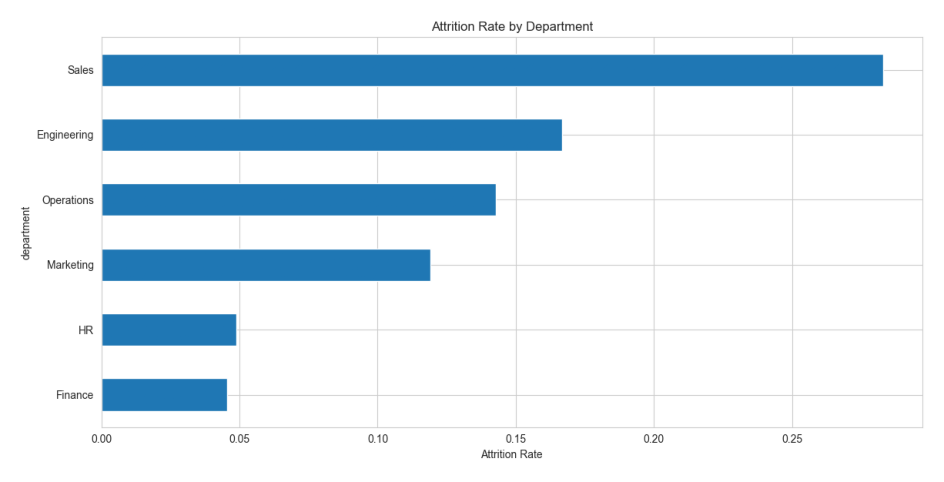

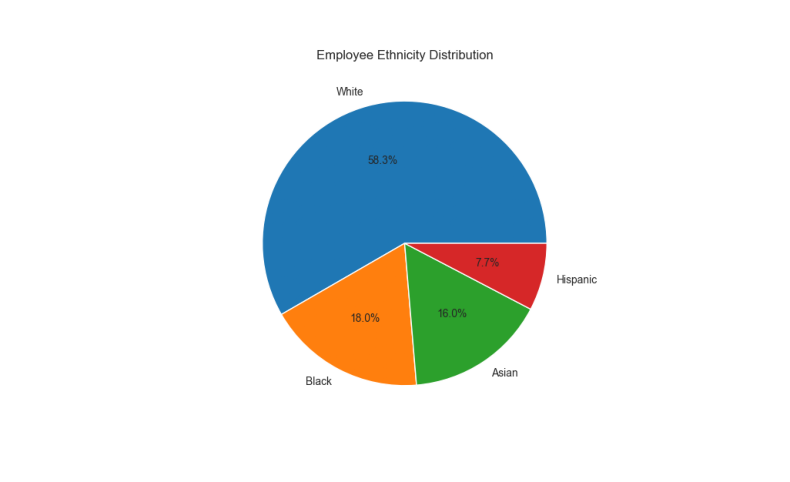

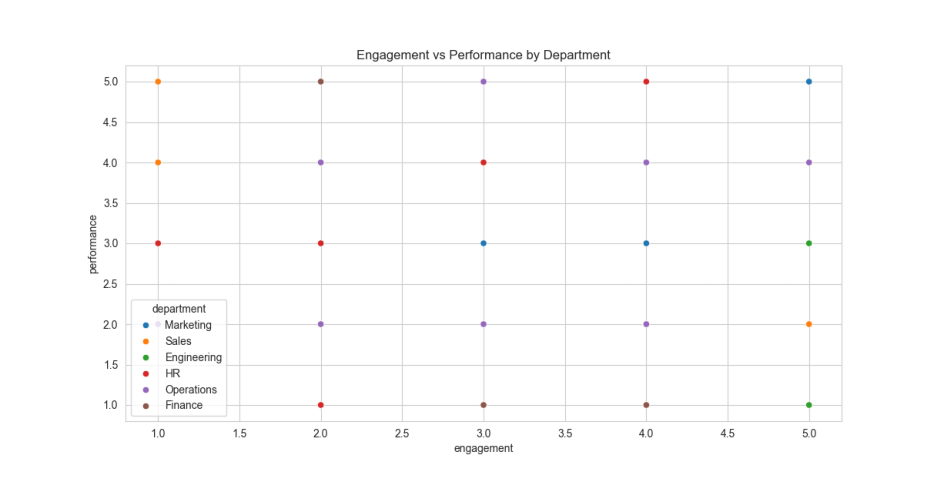

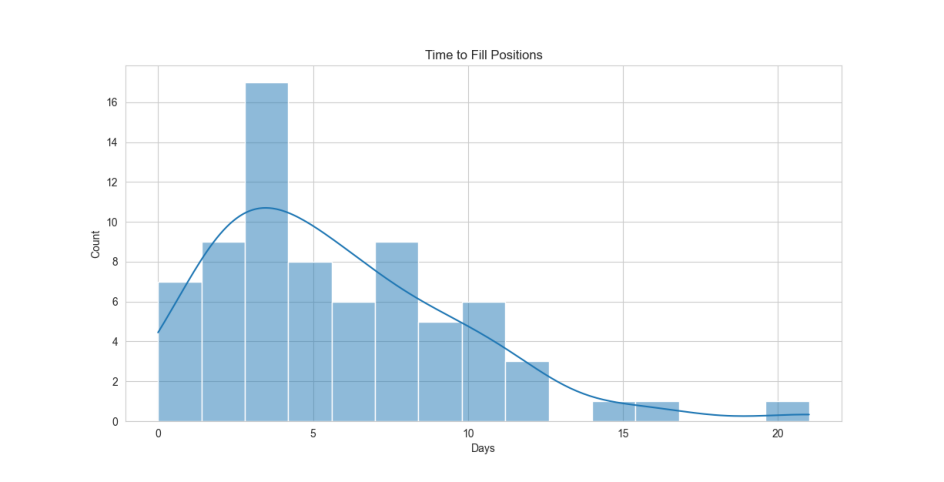

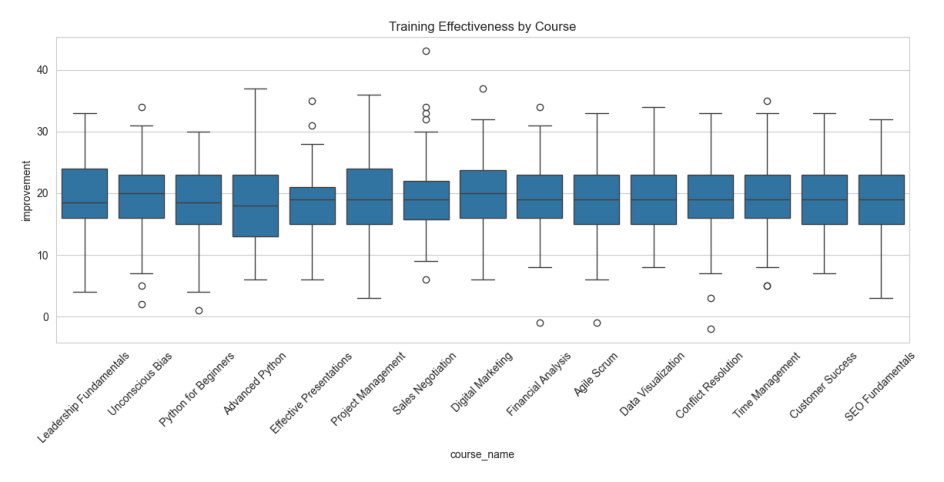

In [6]:
# Generated visuals
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Administrator\Documents\HR Analytics\visualizations\attrition_by_dept.png")
plt.imshow(img)
plt.axis('off')  # Hides axes
plt.show()

img = mpimg.imread(r"C:\Users\Administrator\Documents\HR Analytics\visualizations\diversity_ethnicity.png")
plt.imshow(img)
plt.axis('off')  # Hides axes
plt.show()

img = mpimg.imread(r"C:\Users\Administrator\Documents\HR Analytics\visualizations\engagement_vs_performance.png")
plt.imshow(img)
plt.axis('off')  # Hides axes
plt.show()

img = mpimg.imread(r"C:\Users\Administrator\Documents\HR Analytics\visualizations\time_to_fill.png")
plt.imshow(img)
plt.axis('off')  # Hides axes
plt.show()

img = mpimg.imread(r"C:\Users\Administrator\Documents\HR Analytics\visualizations\training_effectiveness.png")
plt.imshow(img)
plt.axis('off')  # Hides axes
plt.show()



 Training Effectiveness Summary


,Metric,Value
0,Total Trainings Conducted,1301
1,Avg Training Hours,4.26
2,Avg Skill Improvement Score,19.13
3,Avg Pre/Post-Test Improvement,19.13
4,Application on the Job (%),53.3%


 Top 5 Most Attended Courses


,Course Name,Completions
0,Conflict Resolution,102
1,Sales Negotiation,100
2,Financial Analysis,99
3,Effective Presentations,98
4,Python for Beginners,98


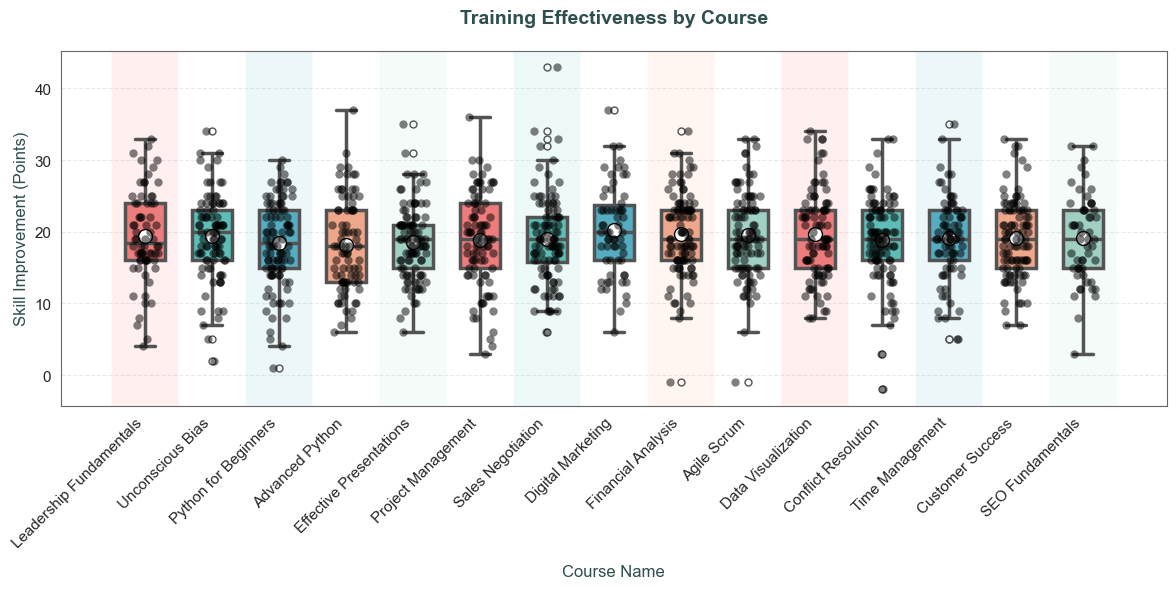

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load and Prepare Data

df = pd.read_csv("C:/Users/Administrator/Documents/HR Analytics/training_data.csv")  # Update with your filename

# Calculate skill improvement
df['skill_improvement'] = df['post_test'] - df['pre_test']


# Step 2: Generate Summary Metrics

total_trainings = len(df)
avg_hours = df['hours'].mean()
avg_skill_improvement = df['skill_improvement'].mean()
avg_test_improvement = df['skill_improvement'].mean()
applied_pct = df['applied'].mean() * 100

summary_df = pd.DataFrame({
    "Metric": [
        "Total Trainings Conducted",
        "Avg Training Hours",
        "Avg Skill Improvement Score",
        "Avg Pre/Post-Test Improvement",
        "Application on the Job (%)"
    ],
    "Value": [
        total_trainings,
        f"{avg_hours:.2f}",
        f"{avg_skill_improvement:.2f}",
        f"{avg_test_improvement:.2f}",
        f"{applied_pct:.1f}%"
    ]
})

print(" Training Effectiveness Summary")
display(summary_df)


# Step 3: Top 5 Most Attended Courses

top_courses = df['course_name'].value_counts().head(5).reset_index()
top_courses.columns = ['Course Name', 'Completions']
print(" Top 5 Most Attended Courses")
display(top_courses)


# Step 4: Boxplot - Skill Improvement by Course

plt.figure(figsize=(12,6))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'axes.edgecolor': '0.4'})

palette = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A", "#98D8C8"]

ax = sns.boxplot(
    x='course_name',
    y='skill_improvement',
    data=df,
    palette=palette,
    width=0.6,
    linewidth=2.5,
    fliersize=5,
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}
)

# Add data points with jitter
sns.stripplot(
    x='course_name',
    y='skill_improvement',
    data=df,
    color="black",
    alpha=0.5,
    size=6,
    jitter=0.2
)

# Customize
plt.title("Training Effectiveness by Course", pad=20, fontsize=14, fontweight='bold', color='#2F4F4F')
plt.xlabel("Course Name", fontsize=12, labelpad=10, color='#2F4F4F')
plt.ylabel("Skill Improvement (Points)", fontsize=12, color='#2F4F4F')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.4)

# Add background color bands
for i in range(0, len(ax.get_xticks()), 2):
    ax.axvspan(i-0.5, i+0.5, facecolor=palette[i % len(palette)], alpha=0.1)

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Configuration - Set your custom paths here
DATA_PATHS = {
    'employees': 'C:/Users/Administrator/Documents/HR Analytics/employee_data.csv',
    'training': 'C:/Users/Administrator/Documents/HR Analytics/training_data.csv',
    'openings': 'C:/Users/Administrator/Documents/HR Analytics/openings_data.csv',
    'applications': 'C:/Users/Administrator/Documents/HR Analytics/applications_data.csv'
}

def load_and_prepare_data():
    """Load all source data files and perform initial cleaning"""
    print("Loading source data...")
    
    # Load all datasets with error handling
    try:
        employees = pd.read_csv(DATA_PATHS['employees'])
        training = pd.read_csv(DATA_PATHS['training'])
        openings = pd.read_csv(DATA_PATHS['openings'])
        applications = pd.read_csv(DATA_PATHS['applications'])
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

    # Convert dates safely
    date_columns = {
        'employees': ['hire_date', 'termination_date'],
        'training': ['completion_date'],
        'openings': ['post_date', 'close_date'],
        'applications': ['application_date']
    }
    
    for df_name, cols in date_columns.items():
        df = locals()[df_name]
        for col in cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

    # Create active status flag
    if 'termination_date' in employees.columns:
        employees['active_status'] = employees['termination_date'].isna()
    
    return employees, training, openings, applications

def analyze_attrition(employees):
    """Calculate key attrition metrics"""
    print("\nAnalyzing attrition patterns...")
    
    results = {}
    employees = employees.copy()  # Avoid SettingWithCopyWarning
    
    # Overall attrition rate
    results['attrition_rate'] = employees['termination_date'].notna().mean()
    
    # Voluntary vs involuntary turnover
    if 'voluntary' in employees.columns:
        voluntary = employees[employees['termination_date'].notna()].copy()
        results['voluntary_turnover'] = voluntary['voluntary'].value_counts(normalize=True)
    
    # Retention by department
    results['retention_by_dept'] = employees.groupby('department')['active_status'].mean()
    
    # Tenure analysis
    current_date = pd.to_datetime('today')
    employees.loc[:, 'tenure_days'] = np.where(
        employees['termination_date'].isna(),
        (current_date - employees['hire_date']).dt.days,
        (employees['termination_date'] - employees['hire_date']).dt.days
    )
    results['avg_tenure_by_dept'] = employees.groupby('department')['tenure_days'].mean()
    
    return results

def analyze_training(employees, training):
    """Evaluate training program effectiveness"""
    print("\nAnalyzing training effectiveness...")
    
    # Merge employee and training data
    merged = pd.merge(employees, training, on='employee_id', how='left').copy()
    
    results = {}
    
    # Training completion rates by department
    results['completion_rates'] = merged.groupby(['department', 'course_name'])['completion_date'].count() / \
                                merged.groupby('department')['employee_id'].count()
    
    # Skill improvement analysis
    if all(col in merged.columns for col in ['post_test', 'pre_test']):
        merged.loc[:, 'skill_improvement'] = merged['post_test'] - merged['pre_test']
        results['skill_improvement'] = merged.groupby(['department', 'course_name'])['skill_improvement'].mean()
    
    # Training application rate
    if 'applied' in merged.columns:
        results['application_rate'] = merged.groupby('course_name')['applied'].mean()
    
    return results

def analyze_recruitment(openings, applications):
    """Analyze hiring pipeline efficiency"""
    print("\nAnalyzing recruitment metrics...")
    
    results = {}
    openings = openings.copy()  # Avoid SettingWithCopyWarning
    
    # Time-to-fill metrics
    filled = openings[openings['filled'] == True].copy()
    filled.loc[:, 'days_to_fill'] = (filled['close_date'] - filled['post_date']).dt.days
    results['time_to_fill'] = filled['days_to_fill'].describe()
    
    # Source effectiveness
    results['source_effectiveness'] = applications.groupby('source')['outcome'].value_counts(normalize=True)
    
    # Diversity in applicants
    results['applicant_diversity'] = applications['demographic'].value_counts(normalize=True)
    
    return results

def prepare_pbi_export(emp_df, train_df, open_df, app_df):
    """Prepare all datasets for Power BI with calculated metrics"""
    print("\nPreparing data for Power BI...")
    
    # Create copies to avoid warnings
    emp_df = emp_df.copy()
    train_df = train_df.copy()
    open_df = open_df.copy()
    app_df = app_df.copy()
    
    # Employee Data Enhancements
    emp_df.loc[:, 'current_date'] = pd.to_datetime('today')
    
    # Calculate tenure in DAYS
    emp_df.loc[:, 'tenure_days'] = np.where(
        emp_df['termination_date'].isna(),
        (emp_df['current_date'] - emp_df['hire_date']).dt.days,
        (emp_df['termination_date'] - emp_df['hire_date']).dt.days
    )
    
    # Create flags for Power BI measures
    emp_df.loc[:, 'is_active'] = emp_df['termination_date'].isna().astype(int)
    if 'voluntary' in emp_df.columns:
        emp_df.loc[:, 'is_voluntary'] = emp_df['voluntary'].fillna(0).astype(int)
    
    # Training Data Enhancements
    if all(col in train_df.columns for col in ['post_test', 'pre_test']):
        train_df.loc[:, 'skill_improvement'] = train_df['post_test'] - train_df['pre_test']
    
    # Openings Data Enhancements
    if all(col in open_df.columns for col in ['close_date', 'post_date']):
        open_df.loc[:, 'days_to_fill'] = (open_df['close_date'] - open_df['post_date']).dt.days
    
    # Save processed data to same directory as source files
    try:
        emp_df.to_csv(DATA_PATHS['employees'].replace('.csv', '_pbi.csv'), index=False)
        train_df.to_csv(DATA_PATHS['training'].replace('.csv', '_pbi.csv'), index=False)
        open_df.to_csv(DATA_PATHS['openings'].replace('.csv', '_pbi.csv'), index=False)
        app_df.to_csv(DATA_PATHS['applications'].replace('.csv', '_pbi.csv'), index=False)
        
        print("Power BI data successfully exported to source directory:")
        print(f"- {DATA_PATHS['employees'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['training'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['openings'].replace('.csv', '_pbi.csv')}")
        print(f"- {DATA_PATHS['applications'].replace('.csv', '_pbi.csv')}")
    except Exception as e:
        print(f"Error saving files: {e}")

if __name__ == "__main__":
    print("Starting HR Analytics Pipeline\n" + "="*50)
    
    try:
        # Load data
        employees, training, openings, applications = load_and_prepare_data()
        
        # Run analyses
        attrition = analyze_attrition(employees)
        training_effectiveness = analyze_training(employees, training)
        recruitment = analyze_recruitment(openings, applications)
        
        # Prepare and export Power BI files
        prepare_pbi_export(employees, training, openings, applications)
        
        print("\nHR Analytics processing complete!")
    except Exception as e:
        print(f"\nError in HR Analytics pipeline: {e}")

Starting HR Analytics Pipeline
Loading source data...

Analyzing attrition patterns...

Analyzing training effectiveness...

Analyzing recruitment metrics...

Preparing data for Power BI...
Power BI data successfully exported to source directory:
- C:/Users/Administrator/Documents/HR Analytics/employee_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/training_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/openings_data_pbi.csv
- C:/Users/Administrator/Documents/HR Analytics/applications_data_pbi.csv

HR Analytics processing complete!
